<a href="https://colab.research.google.com/github/kurmanbekbazarov/Investigating-Cardiovascular-Activation-in-Routine-Driving/blob/main/Masking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Minute_level_Data_After_Feature_Extraction.csv")
df.head()

,Time,P_ID,Day_Num,Trips,Time.1,Speed,ATP,Raw_HR,BL_HR,NR_HR,...,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Openness,Hours,Trip_Time,Distance,Trip_Distance,FF_Speed
0,2/13/2023 7:34,P130,Day1,Trip1,34:29.5,8.216667,18.045556,85.272727,74.0,11.272727,...,51,3,9,5,9,3/21/2023 7:34,Morning,0.068831,0.059565,22.973333
1,2/13/2023 7:35,P130,Day1,Trip1,35:29.5,13.663889,19.140556,84.300000,74.0,10.300000,...,51,3,9,5,9,3/21/2023 7:35,Morning,0.239338,0.230599,17.742111
2,2/13/2023 7:36,P130,Day1,Trip1,36:29.5,2.491667,15.838611,81.461538,74.0,7.461538,...,51,3,9,5,9,3/21/2023 7:36,Morning,0.332670,0.322756,30.318333
3,2/13/2023 7:37,P130,Day1,Trip1,37:29.5,20.386111,19.302778,81.818182,74.0,7.818182,...,51,3,9,5,9,3/21/2023 7:37,Morning,0.473716,0.462645,12.635389
4,2/13/2023 7:38,P130,Day1,Trip1,38:29.5,38.802778,19.012778,81.692308,74.0,7.692308,...,51,3,9,5,9,3/21/2023 7:38,Morning,1.083383,1.071310,-6.083778


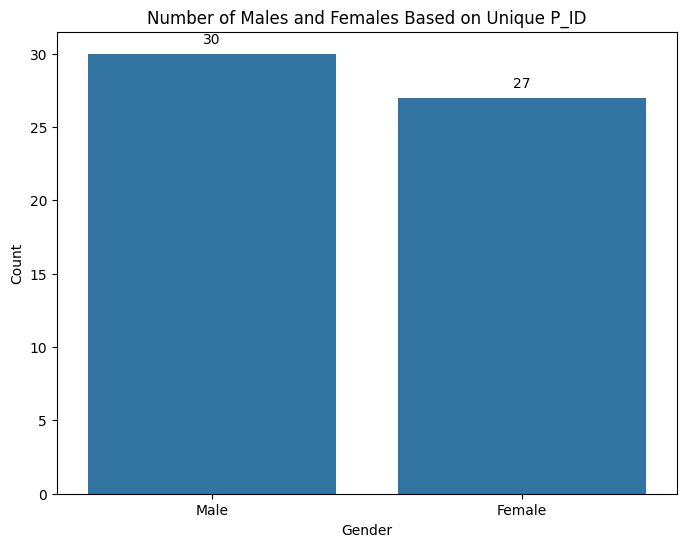

In [8]:
# Ensure P_ID is unique by dropping duplicates
unique_df = df.drop_duplicates(subset='P_ID')

# Count the number of males and females
gender_counts = unique_df['Gender'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=gender_counts.index, y=gender_counts.values)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Number of Males and Females Based on Unique P_ID')

# Annotate the bars with the counts
for i, count in enumerate(gender_counts.values):
    bar_plot.text(i, count + 0.5, str(count), ha='center', va='bottom')

plt.show()

In [9]:
# Ensure P_ID is unique by dropping duplicates
unique_df = df.drop_duplicates(subset='P_ID')

# Print each unique P_ID with gender
for _, row in unique_df.iterrows():
    print(f'P_ID: {row["P_ID"]}, Gender: {row["Gender"]}')

P_ID: P130, Gender: Female
P_ID: P78, Gender: Female
P_ID: P120, Gender: Female
P_ID: P124, Gender: Female
P_ID: P125, Gender: Female
P_ID: P126, Gender: Male
P_ID: P127, Gender: Female
P_ID: P129, Gender: Female
P_ID: P131, Gender: Female
P_ID: P133, Gender: Female
P_ID: P134, Gender: Female
P_ID: P100, Gender: Female
P_ID: P103, Gender: Female
P_ID: P107, Gender: Male
P_ID: P109, Gender: Male
P_ID: P114, Gender: Female
P_ID: P116, Gender: Female
P_ID: P117, Gender: Female
P_ID: P12, Gender: Female
P_ID: P18, Gender: Male
P_ID: P20, Gender: Male
P_ID: P22, Gender: Female
P_ID: P23, Gender: Female
P_ID: P24, Gender: Male
P_ID: P27, Gender: Male
P_ID: P29, Gender: Male
P_ID: P32, Gender: Male
P_ID: P33, Gender: Female
P_ID: P35, Gender: Male
P_ID: P36, Gender: Female
P_ID: P37, Gender: Male
P_ID: P39, Gender: Male
P_ID: P42, Gender: Male
P_ID: P45, Gender: Male
P_ID: P46, Gender: Female
P_ID: P47, Gender: Female
P_ID: P48, Gender: Male
P_ID: P52, Gender: Male
P_ID: P54, Gender: Male
P_I

In [11]:
# Number of subjects in the entire dataset
total_subjects = 57
total_men = 30
total_women = 27

# Calculate the ratio of men to women in the entire dataset
ratio_men_total = total_men / total_subjects
ratio_women_total = total_women / total_subjects

# Number of subjects to select in the subset
subset_size = 28

# Determine the number of men and women to select in the subset based on the desired ratio
num_men_subset = int(subset_size * ratio_men_total)
num_women_subset = subset_size - num_men_subset

print(num_men_subset)
print(num_women_subset)

# Randomly select subjects from each gender group to form the subset
# selected_men_subset = np.random.choice(total_men, num_men_subset, replace=False)
# selected_women_subset = np.random.choice(total_women, num_women_subset, replace=False)

# Display the selected subjects in the subset
# print("Selected male subjects in the subset:", selected_men_subset)
# print("Selected female subjects in the subset:", selected_women_subset)


14
14


In [24]:
# Define a list of P_IDs to select
selected_pids = ['P130', 'P78', 'P120', 'P124', 'P125', 'P127', 'P129', 'P131', 'P133', 'P134', 'P100', 'P103', 'P114', 'P116', 'P117']  # Add more P_IDs as needed

# Select rows where P_ID is in the list of selected P_IDs
selected_data_female = df[df['P_ID'].isin(selected_pids)]

# Get the size of the dataset (number of rows and columns)
dataset_size = selected_data_female.shape

# Print the size of the dataset
print("Number of rows:", dataset_size[0])

Number of rows: 3595


In [25]:
selected_data_female.tail()

,Time,P_ID,Day_Num,Trips,Time.1,Speed,ATP,Raw_HR,BL_HR,NR_HR,...,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Openness,Hours,Trip_Time,Distance,Trip_Distance,FF_Speed
4273,1/21/2023 21:37,P117,Day6,Trip3,37:29.5,6.469444,19.566667,85.846154,78.236,7.610154,...,50,5,10,5,7,3/21/2023 21:37,Afternoon,3.883728,3.252646,25.876056
4274,1/21/2023 21:38,P117,Day6,Trip3,38:29.5,27.138889,24.410277,84.333333,78.236,6.097333,...,50,5,10,5,7,3/21/2023 21:38,Afternoon,4.076544,3.206701,4.661611
4275,1/21/2023 21:39,P117,Day6,Trip3,39:29.5,23.325000,23.319167,85.833333,78.236,7.597333,...,50,5,10,5,7,3/21/2023 21:39,Afternoon,4.048580,2.839954,8.260000
4276,1/21/2023 21:40,P117,Day6,Trip3,40:29.5,47.166667,27.480000,87.363636,78.236,9.127636,...,50,5,10,5,7,3/21/2023 21:40,Afternoon,4.006042,2.203413,-15.554667
4277,1/21/2023 21:41,P117,Day6,Trip3,41:29.5,36.777778,21.996111,90.307692,78.236,12.071692,...,50,5,10,5,7,3/21/2023 21:41,Afternoon,4.174941,1.690662,-5.105778


In [26]:
# Ensure P_ID is unique by dropping duplicates
unique_df = selected_data_female.drop_duplicates(subset='P_ID')

# Print each unique P_ID with gender
for _, row in unique_df.iterrows():
    print(f'P_ID: {row["P_ID"]}, Gender: {row["Gender"]}')

P_ID: P130, Gender: Female
P_ID: P78, Gender: Female
P_ID: P120, Gender: Female
P_ID: P124, Gender: Female
P_ID: P125, Gender: Female
P_ID: P127, Gender: Female
P_ID: P129, Gender: Female
P_ID: P131, Gender: Female
P_ID: P133, Gender: Female
P_ID: P134, Gender: Female
P_ID: P100, Gender: Female
P_ID: P103, Gender: Female
P_ID: P114, Gender: Female
P_ID: P116, Gender: Female
P_ID: P117, Gender: Female


In [30]:
# Define a list of P_IDs to select
selected_pids = ['P126', 'P107', 'P109', 'P18', 'P20', 'P24', 'P27', 'P29', 'P32', 'P35', 'P37', 'P39', 'P42', 'P45', 'P48']  # Add more P_IDs as needed

# Select rows where P_ID is in the list of selected P_IDs
selected_data_male = df[df['P_ID'].isin(selected_pids)]

# Get the size of the dataset (number of rows and columns)
dataset_size = selected_data_male.shape

# Print the size of the dataset
print("Number of rows:", dataset_size[0])

Number of rows: 3820


In [31]:
selected_data_male.tail()

,Time,P_ID,Day_Num,Trips,Time.1,Speed,ATP,Raw_HR,BL_HR,NR_HR,...,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Openness,Hours,Trip_Time,Distance,Trip_Distance,FF_Speed
9171,8/21/2022 14:00,P48,Day7,Trip2,00:29.5,43.147222,33.223334,93.461538,80.0,13.461538,...,40,6,9,8,6,3/21/2023 14:00,Afternoon,78.516856,22.700726,-7.917222
9172,8/21/2022 14:01,P48,Day7,Trip2,01:29.5,48.005555,30.546389,92.000000,80.0,12.000000,...,40,6,9,8,6,3/21/2023 14:01,Afternoon,78.673417,23.477134,-12.330555
9173,8/21/2022 14:02,P48,Day7,Trip2,02:29.5,42.944444,31.681945,95.538462,80.0,15.538462,...,40,6,9,8,6,3/21/2023 14:02,Afternoon,79.256959,23.934742,-5.044444
9174,8/21/2022 14:03,P48,Day7,Trip2,03:29.5,36.294444,27.655833,96.333333,80.0,16.333333,...,40,6,9,8,6,3/21/2023 14:03,Afternoon,79.673417,24.139681,1.605556
9175,8/21/2022 14:04,P48,Day7,Trip2,04:29.5,37.905556,40.891111,98.545455,80.0,18.545455,...,40,6,9,8,6,3/21/2023 14:04,Afternoon,79.836858,24.611368,-0.005556


In [32]:
# Ensure P_ID is unique by dropping duplicates
unique_df = selected_data_male.drop_duplicates(subset='P_ID')

# Print each unique P_ID with gender
for _, row in unique_df.iterrows():
    print(f'P_ID: {row["P_ID"]}, Gender: {row["Gender"]}')

P_ID: P126, Gender: Male
P_ID: P107, Gender: Male
P_ID: P109, Gender: Male
P_ID: P18, Gender: Male
P_ID: P20, Gender: Male
P_ID: P24, Gender: Male
P_ID: P27, Gender: Male
P_ID: P29, Gender: Male
P_ID: P32, Gender: Male
P_ID: P35, Gender: Male
P_ID: P37, Gender: Male
P_ID: P39, Gender: Male
P_ID: P42, Gender: Male
P_ID: P45, Gender: Male
P_ID: P48, Gender: Male


In [34]:
concatenated_df = pd.concat([selected_data_female, selected_data_male], ignore_index=True)

# Print the concatenated DataFrame
concatenated_df.head()

,Time,P_ID,Day_Num,Trips,Time.1,Speed,ATP,Raw_HR,BL_HR,NR_HR,...,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Openness,Hours,Trip_Time,Distance,Trip_Distance,FF_Speed
0,2/13/2023 7:34,P130,Day1,Trip1,34:29.5,8.216667,18.045556,85.272727,74.0,11.272727,...,51,3,9,5,9,3/21/2023 7:34,Morning,0.068831,0.059565,22.973333
1,2/13/2023 7:35,P130,Day1,Trip1,35:29.5,13.663889,19.140556,84.300000,74.0,10.300000,...,51,3,9,5,9,3/21/2023 7:35,Morning,0.239338,0.230599,17.742111
2,2/13/2023 7:36,P130,Day1,Trip1,36:29.5,2.491667,15.838611,81.461538,74.0,7.461538,...,51,3,9,5,9,3/21/2023 7:36,Morning,0.332670,0.322756,30.318333
3,2/13/2023 7:37,P130,Day1,Trip1,37:29.5,20.386111,19.302778,81.818182,74.0,7.818182,...,51,3,9,5,9,3/21/2023 7:37,Morning,0.473716,0.462645,12.635389
4,2/13/2023 7:38,P130,Day1,Trip1,38:29.5,38.802778,19.012778,81.692308,74.0,7.692308,...,51,3,9,5,9,3/21/2023 7:38,Morning,1.083383,1.071310,-6.083778


In [35]:
# Get the size of the dataset (number of rows and columns)
dataset_size = concatenated_df.shape

# Print the size of the dataset
print("Number of rows:", dataset_size[0])

Number of rows: 7415


In [36]:
# Save the concatenated DataFrame to a CSV file
concatenated_df.to_csv('equal_male_to_female_ratio.csv', index=False)